In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 1000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [4]:
kappa = 5
P = 50
T = 30

In [5]:
x = bernouli_gaussian(N, rho)
SNR = 60

In [6]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)

# i.i.d.ガウス行列での信号再構成

In [7]:
tmp_iidG = [AMP(iidG.A, x, SNR), 
        D_AMP(iidG.A, x, SNR, P), 
        OAMP(iidG.A, x, SNR), 
        D_OAMP(iidG.A, x, SNR, P)]

final mse: 0.0493041493851643


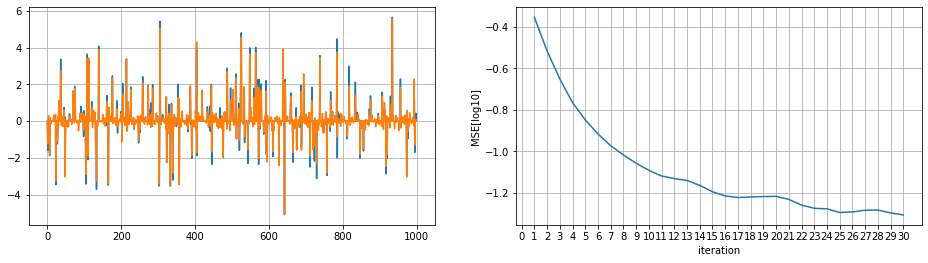

In [8]:
tmp_iidG[0].estimate(T=T)
tmp_iidG[0].result()

In [9]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[1].estimate(T=T, log=True)

N(P-1): 49000

1/30: tau = 1.339178740296958, v = 0.6692550083730564
Rp: 19576.0 	 F: 406 	 F\Rp: 12145
Total Communication Cost: 31721
2/30: tau = 0.7707821430294829, v = 0.3850567097393189
Rp: 19140.0 	 F: 449 	 F\Rp: 13613
Total Communication Cost: 32753
3/30: tau = 0.5709092663743188, v = 0.2851202714117368
Rp: 20211.0 	 F: 446 	 F\Rp: 13046
Total Communication Cost: 33257
4/30: tau = 0.426823629891318, v = 0.21307745317023638
Rp: 19518.0 	 F: 452 	 F\Rp: 13451
Total Communication Cost: 32969
5/30: tau = 0.31949571885543543, v = 0.159413497652295
Rp: 20334.0 	 F: 468 	 F\Rp: 13537
Total Communication Cost: 33871
6/30: tau = 0.24561525086848815, v = 0.12247326365882141
Rp: 20260.0 	 F: 473 	 F\Rp: 13782
Total Communication Cost: 34042
7/30: tau = 0.19095134191318214, v = 0.09514130918116841
Rp: 21707.0 	 F: 499 	 F\Rp: 13720
Total Communication Cost: 35427
8/30: tau = 0.16797194223003786, v = 0.08365160933959628
Rp: 20940.0 	 F: 496 	 F\Rp: 13932
Total Communication Cost: 34872
9/30

final mse: 0.031295275163375796


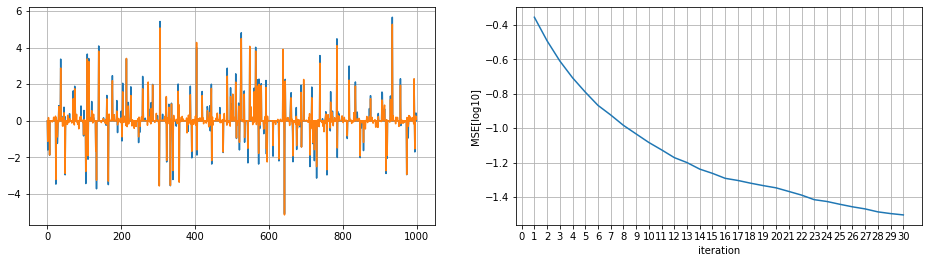

In [10]:
tmp_iidG[1].result()

final mse: 0.004938724703401803


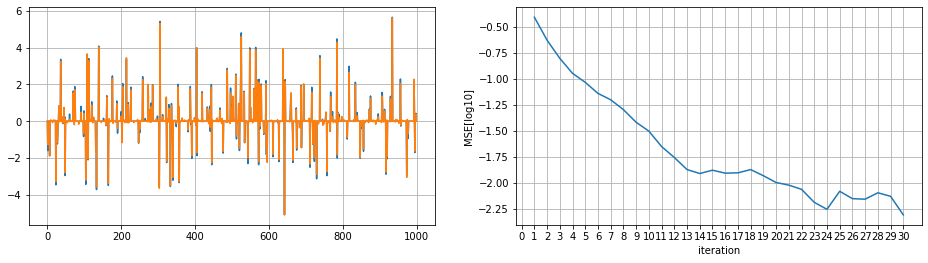

In [11]:
tmp_iidG[2].estimate(T=T)
tmp_iidG[2].result()

In [12]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[3].estimate(T=T, log=True)

N(P-1): 49000

1/30: tau = 0.670725176933175, v = 0.6693870104296479
Rp: 32961.0 	 F: 464 	 F\Rp: 7847
Total Communication Cost: 40808
2/30: tau = 0.29677042892840816, v = 0.2954330028050623
Rp: 33042.0 	 F: 494 	 F\Rp: 8345
Total Communication Cost: 41387
3/30: tau = 0.19313971468788374, v = 0.19180426491159758
Rp: 33330.0 	 F: 458 	 F\Rp: 7571
Total Communication Cost: 40901
4/30: tau = 0.11292426763783389, v = 0.11159128302691926
Rp: 33294.0 	 F: 472 	 F\Rp: 7852
Total Communication Cost: 41146
5/30: tau = 0.06985962421291231, v = 0.0685309650322516
Rp: 33076.0 	 F: 506 	 F\Rp: 8474
Total Communication Cost: 41550
6/30: tau = 0.06384976512629975, v = 0.06252400401926718
Rp: 33098.0 	 F: 500 	 F\Rp: 8277
Total Communication Cost: 41375
7/30: tau = 0.043788050896839716, v = 0.04246669310982601
Rp: 33122.0 	 F: 509 	 F\Rp: 8317
Total Communication Cost: 41439
8/30: tau = 0.03939862445598185, v = 0.03808119236492219
Rp: 33055.0 	 F: 518 	 F\Rp: 8467
Total Communication Cost: 41522
9/30:

final mse: 0.003266928582602791


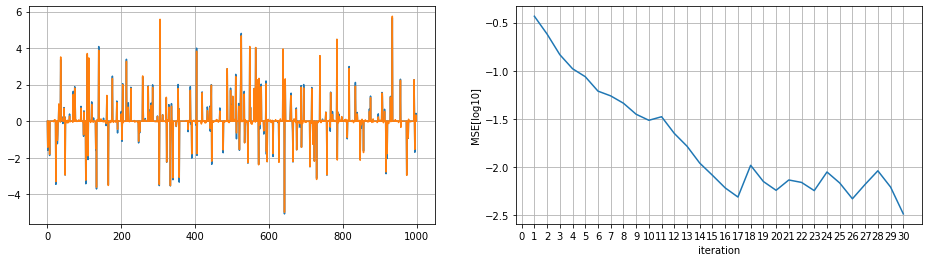

In [13]:
tmp_iidG[3].result()

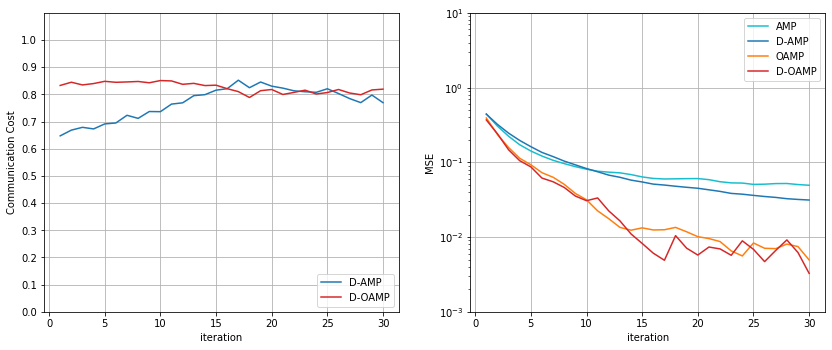

In [14]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_iidG[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_iidG[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_iidG[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_iidG[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_iidG[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_iidG[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()

# ユニタリ不変行列での信号再構成

In [15]:
tmp_UniInv = [AMP(UniInv.A, x, SNR), 
              D_AMP(UniInv.A, x, SNR, P), 
              OAMP(UniInv.A, x, SNR), 
              D_OAMP(UniInv.A, x, SNR, P)]

final mse: 1.6274725478930847e+57


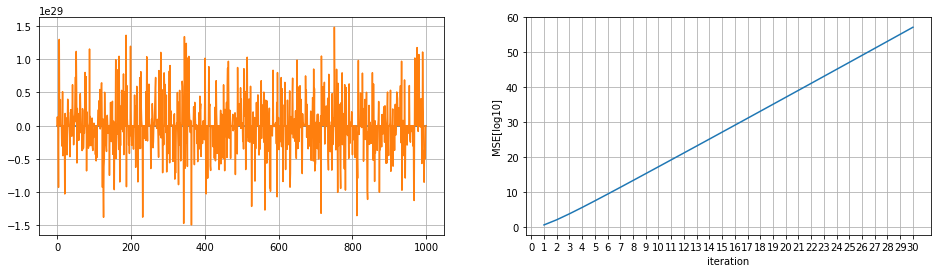

In [16]:
tmp_UniInv[0].estimate(T=T)
tmp_UniInv[0].result()

In [17]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[1].estimate(T=T, log=True)

N(P-1): 49000


1/30: tau = 1.3758715736526084, v = 0.6871061022716498
Rp: 35736.0 	 F: 742 	 F\Rp: 10497
Total Communication Cost: 46233
2/30: tau = 42.03206226784406, v = 21.01520144936738
Rp: 32445.0 	 F: 730 	 F\Rp: 12683
Total Communication Cost: 45128
3/30: tau = 1587.6258142387, v = 793.8120774347954
Rp: 33256.0 	 F: 746 	 F\Rp: 12378
Total Communication Cost: 45634
4/30: tau = 90189.6048289514, v = 45094.801584791145
Rp: 33557.0 	 F: 736 	 F\Rp: 12016
Total Communication Cost: 45573
5/30: tau = 6320025.0694362065, v = 3160012.533888419
Rp: 33828.0 	 F: 728 	 F\Rp: 11643
Total Communication Cost: 45471
6/30: tau = 500312085.28963023, v = 250156042.64398545
Rp: 33972.0 	 F: 728 	 F\Rp: 11589
Total Communication Cost: 45561
7/30: tau = 42714687052.18843, v = 21357343526.093388
Rp: 34106.0 	 F: 732 	 F\Rp: 11559
Total Communication Cost: 45665
8/30: tau = 3807186129026.4653, v = 1903593064513.2322
Rp: 34113.0 	 F: 733 	 F\Rp: 11593
Total Communication Cost: 45706
9/30: tau = 347655

final mse: 1.9726861627177322e+57


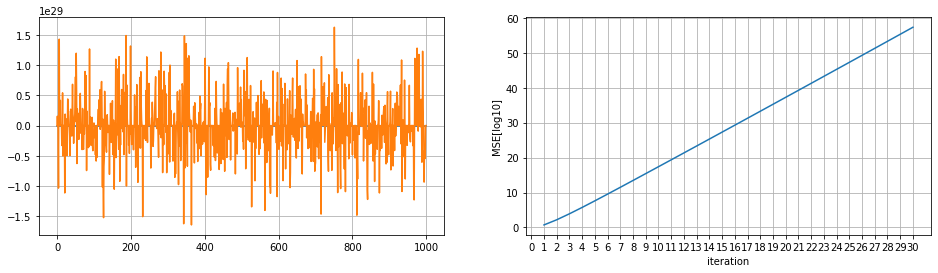

In [18]:
tmp_UniInv[1].result()

final mse: 0.0014057436882489722


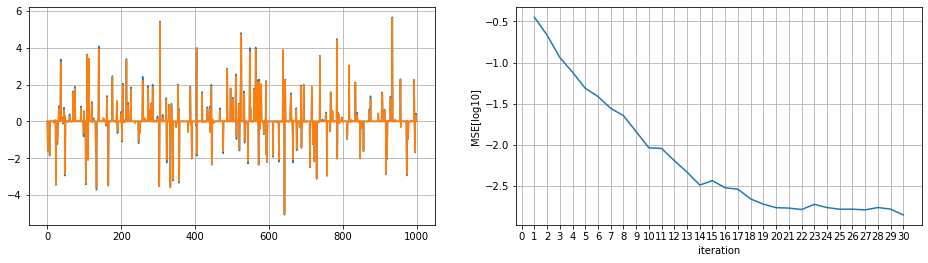

In [19]:
tmp_UniInv[2].estimate(T=T)
tmp_UniInv[2].result()

In [20]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[3].estimate(T=T, log=True)

N(P-1): 49000


1/30: tau = 0.6881984514446616, v = 0.6866712664828543
Rp: 33834.0 	 F: 470 	 F\Rp: 7438
Total Communication Cost: 41272
2/30: tau = 0.34012317099527134, v = 0.33859662447097455
Rp: 33885.0 	 F: 477 	 F\Rp: 7645
Total Communication Cost: 41530
3/30: tau = 0.19471118568948093, v = 0.19318638483846723
Rp: 33662.0 	 F: 487 	 F\Rp: 7816
Total Communication Cost: 41478
4/30: tau = 0.09255205012328098, v = 0.09103040720787424
Rp: 33960.0 	 F: 488 	 F\Rp: 7689
Total Communication Cost: 41649
5/30: tau = 0.06314567624917534, v = 0.061629606149617815
Rp: 33825.0 	 F: 474 	 F\Rp: 7518
Total Communication Cost: 41343
6/30: tau = 0.042163881258509575, v = 0.040653782020766874
Rp: 33944.0 	 F: 491 	 F\Rp: 7604
Total Communication Cost: 41548
7/30: tau = 0.03754904616599344, v = 0.036043488722188564
Rp: 33709.0 	 F: 465 	 F\Rp: 7272
Total Communication Cost: 40981
8/30: tau = 0.023798164988221834, v = 0.0223013805108996
Rp: 33895.0 	 F: 496 	 F\Rp: 7590
Total Communication Cost: 4148

final mse: 0.0026066439752901677


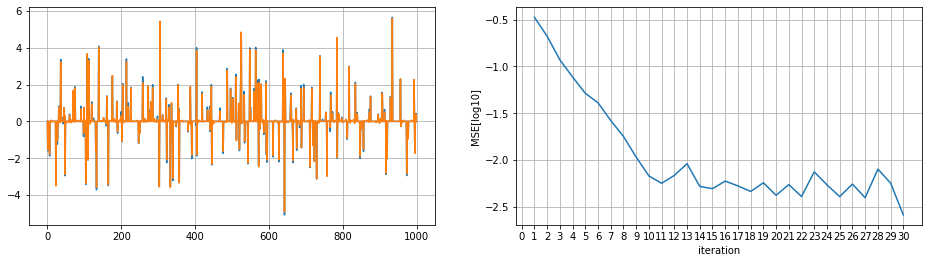

In [21]:
tmp_UniInv[3].result()

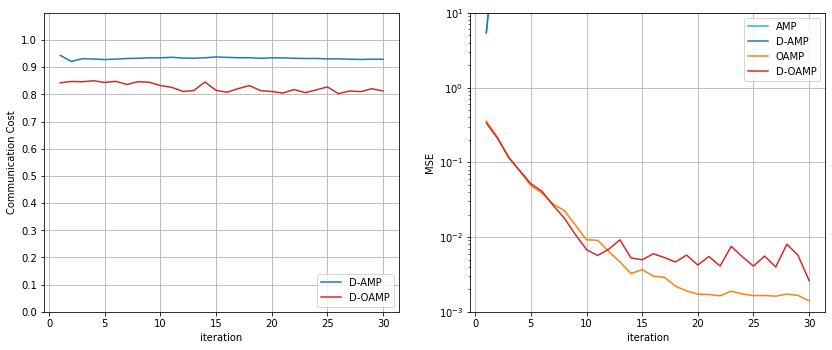

In [22]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_UniInv[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_UniInv[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_UniInv[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_UniInv[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_UniInv[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_UniInv[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()